In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf
import scipy.io.wavfile as wavfile
import sounddevice as sd
import math
import time

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

: 

In [12]:
duration = 5
sample_rate = 44100

name = "rangga"

print("recording start")
def countdown_timer(seconds):
    while seconds > 0:
        print(seconds)
        time.sleep(1)
        seconds -= 1
    print("Time's up!")

# Set the duration of the timer in seconds

# Start the countdown timer
countdown_timer(duration)
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2)
sd.wait()

sf.write(name + ".wav", audio, samplerate=sample_rate)
print("inul succesfully record")

def calculate_leq(signal, sample_rate):
    squared_signal = signal**2
    mean_squared_signal = np.mean(squared_signal)
    leq = 10 * math.log10(mean_squared_signal) + 90.3086
    return leq

def analyze_audio(file_path):
    # Membaca file audio
    sample_rate, audio_data = wavfile.read(file_path)

    # Mengubah audio menjadi sinyal mono jika stereo
    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)

    # Menghitung Level Kebisingan Equivalent (L_eq)
    duration = len(audio_data) / sample_rate
    leq = calculate_leq(audio_data, sample_rate)

    # Menampilkan hasil
    print("Durasi Audio: {:.2f} detik".format(duration))
    print("Level Kebisingan Equivalent (L_eq): {:.2f} dB".format(leq))
    print("Status Kebisingan:")
    if leq <= 45:
        print("Tidak bising (Sesuai SNI 03-3958-2011)")
    elif leq <= 55:
        print("Bising ringan (Sesuai SNI 03-3958-2011)")
    elif leq <= 65:
        print("Bising sedang (Sesuai SNI 03-3958-2011)")
    elif leq <= 75:
        print("Bising berat (Sesuai SNI 03-3958-2011)")
    else:
        print("Bising sangat berat (Melebihi standar SNI 03-3958-2011)")

# Memanggil fungsi untuk menganalisis file audio
file_path = name + '.wav'  # Ganti dengan nama file audio Anda
analyze_audio(file_path)
audio_files = glob(name+'.wav')
ipd.Audio(audio_files[0])

recording start
5
4
3
2
1
Time's up!
inul succesfully record
Durasi Audio: 5.00 detik
Level Kebisingan Equivalent (L_eq): 157.13 dB
Status Kebisingan:
Bising sangat berat (Melebihi standar SNI 03-3958-2011)


In [5]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('Recording.wav')

In [2]:
filename = 'audio.wav'  # Ganti dengan nama file audio Anda
audio, fs = sf.read(filename)

# Mengonversi ke tekanan suara dalam pascal (Pa)
pressure = np.abs(audio.flatten())  # Mengambil nilai absolut
pressure_pa = pressure * 2  # Misalnya, menganggap amplitudo sebagai tekanan suara

# Mengonversi ke dB SPL
ref_pressure_pa = 20e-6  # Tekanan suara referensi 20 mikropascal (μPa)

# Menangani kasus tekanan suara yang nol atau mendekati nol
with np.errstate(divide='ignore', invalid='ignore'):
    db_spl = np.where(pressure_pa > 0, 20 * np.log10(pressure_pa / ref_pressure_pa), float('-inf'))

# Cetak nilai dB SPL
print(db_spl)

[     -inf      -inf 9.6910013 ... 9.6910013 9.6910013 9.6910013]


In [5]:
def calculate_leq(signal, sample_rate):
    squared_signal = signal**2
    mean_squared_signal = np.mean(squared_signal)
    leq = 10 * math.log10(mean_squared_signal) + 90.3086
    return leq

def analyze_audio(file_path):
    # Membaca file audio
    sample_rate, audio_data = wavfile.read(file_path)

    # Mengubah audio menjadi sinyal mono jika stereo
    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)

    # Menghitung Level Kebisingan Equivalent (L_eq)
    duration = len(audio_data) / sample_rate
    leq = calculate_leq(audio_data, sample_rate)

    # Menampilkan hasil
    print("Durasi Audio: {:.2f} detik".format(duration))
    print("Level Kebisingan Equivalent (L_eq): {:.2f} dB".format(leq))
    print("Status Kebisingan:")
    if leq <= 45:
        print("Tidak bising (Sesuai SNI 03-3958-2011)")
    elif leq <= 55:
        print("Bising ringan (Sesuai SNI 03-3958-2011)")
    elif leq <= 65:
        print("Bising sedang (Sesuai SNI 03-3958-2011)")
    elif leq <= 75:
        print("Bising berat (Sesuai SNI 03-3958-2011)")
    else:
        print("Bising sangat berat (Melebihi standar SNI 03-3958-2011)")

# Memanggil fungsi untuk menganalisis file audio
file_path = 'farhat.wav'  # Ganti dengan nama file audio Anda
analyze_audio(file_path)

Durasi Audio: 5.00 detik
Level Kebisingan Equivalent (L_eq): 154.63 dB
Status Kebisingan:
Bising sangat berat (Melebihi standar SNI 03-3958-2011)


In [7]:
def calculate_leq(signal, sample_rate):
    squared_signal = signal**2
    mean_squared_signal = np.mean(squared_signal)
    leq = 10 * math.log10(mean_squared_signal)
    return leq

def calculate_nc(leq):
    nc = leq - 94
    return nc

def calculate_sil(leq):
    sil = leq - 10
    return sil

def analyze_audio(file_path):
    # Membaca file audio
    sample_rate, audio_data = wavfile.read(file_path)

    # Mengubah audio menjadi sinyal mono jika stereo
    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)

    # Menghitung Level Kebisingan Equivalent (L_eq)
    leq = calculate_leq(audio_data, sample_rate)

    # Menghitung Noise Criterion (NC)
    nc = calculate_nc(leq)

    # Menghitung Speech Interference Level (SIL)
    sil = calculate_sil(leq)

    # Menampilkan hasil
    print("Level Kebisingan Equivalent (L_eq): {:.2f} dB".format(leq))
    print("Noise Criterion (NC): {:.2f}".format(nc))
    print("Speech Interference Level (SIL): {:.2f} dB".format(sil))

    print("Status Kebisingan:")
    if leq <= 45:
        print("Tidak bising (Sesuai SNI 03-3958-2011)")
    elif leq <= 55:
        print("Bising ringan (Sesuai SNI 03-3958-2011)")
    elif leq <= 65:
        print("Bising sedang (Sesuai SNI 03-3958-2011)")
    elif leq <= 75:
        print("Bising berat (Sesuai SNI 03-3958-2011)")
    else:
        print("Bising sangat berat (Melebihi standar SNI 03-3958-2011)")

# filename = 'audio.wav'  # Ganti dengan nama file audio Anda
# Memanggil fungsi untuk menganalisis file audio
file_path = 'rangga.wav'  # Ganti dengan nama file audio Anda
analyze_audio(file_path)

Level Kebisingan Equivalent (L_eq): 66.82 dB
Noise Criterion (NC): -27.18
Speech Interference Level (SIL): 56.82 dB
Status Kebisingan:
Bising berat (Sesuai SNI 03-3958-2011)


In [22]:
ipd.Audio(audio_files[0])

In [3]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-1.5403828e-08  2.2004727e-08 -2.6757041e-08  3.1865337e-08
 -3.7038106e-08  4.2074433e-08 -4.6823928e-08  5.1054130e-08
 -5.4607497e-08  5.7201319e-08]
shape y: (143766,)
sr: 22050


Exception ignored in: <function AdaptiveWaveplot.__del__ at 0x00000175C2A2D750>
Traceback (most recent call last):
  File "C:\Users\Novin\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\display.py", line 703, in __del__
    self.disconnect(strict=True)
  File "C:\Users\Novin\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\display.py", line 750, in disconnect
    if self.ax:
AttributeError: 'AdaptiveWaveplot' object has no attribute 'ax'


TypeError: AdaptiveWaveplot.__init__() missing 3 required positional arguments: 'y', 'steps', and 'envelope'

<Figure size 1400x500 with 0 Axes>

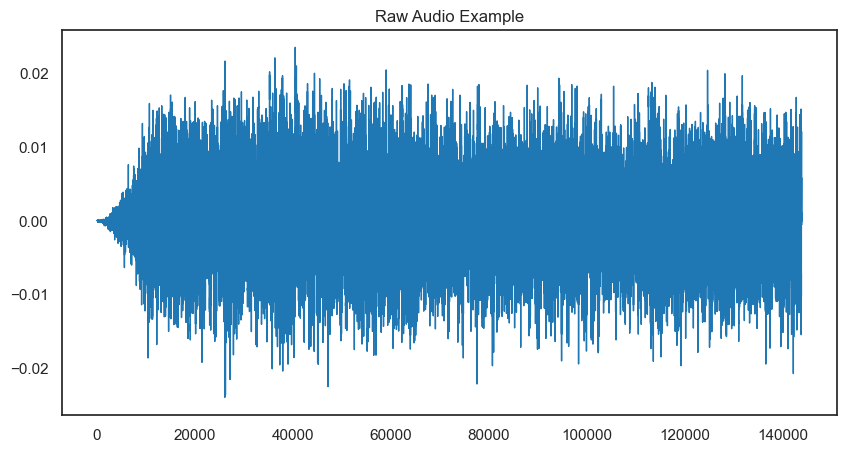

In [6]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[0])
plt.show()

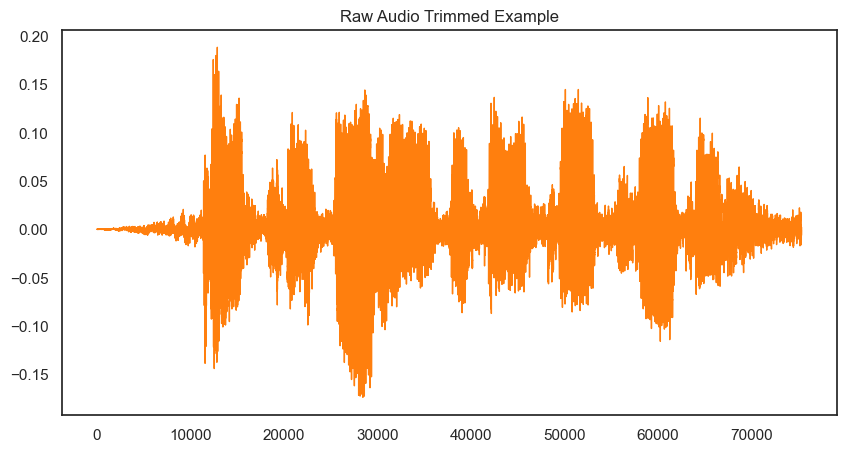

In [60]:
y_trimmed, _ = librosa.effects.trim(y, top_db=60)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                          lw=1,
                          title='Raw Audio Trimmed Example',
                          color=color_pal[1])
plt.show()

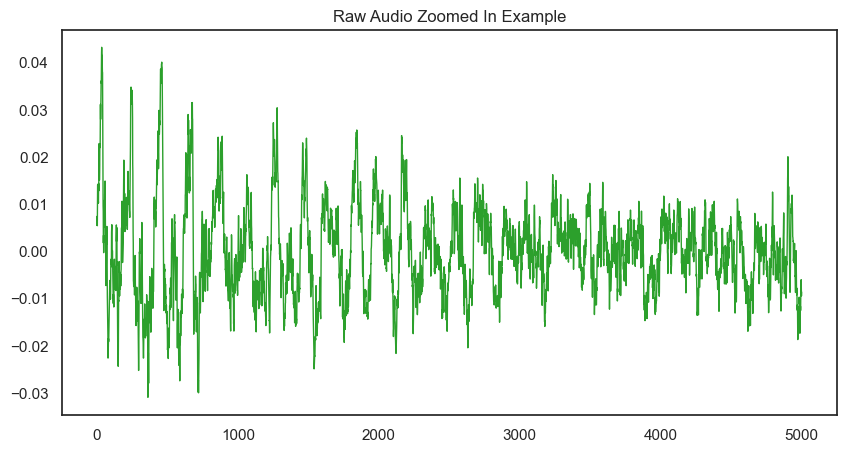

In [65]:
pd.Series(y[70000:75000]).plot(figsize=(10, 5), lw=1, title='Raw Audio Zoomed In Example', color=color_pal[2])
plt.show()

In [66]:


D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
print(S_db.mean())


-59.60143


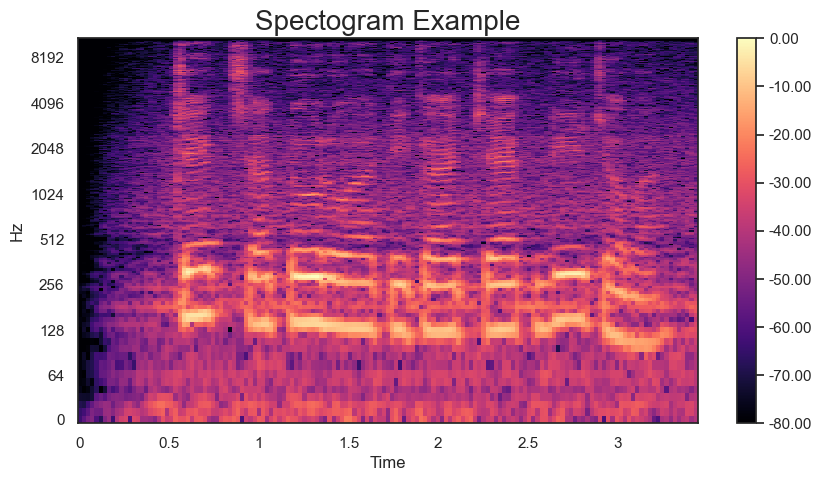

In [67]:


# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()



In [68]:


S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)



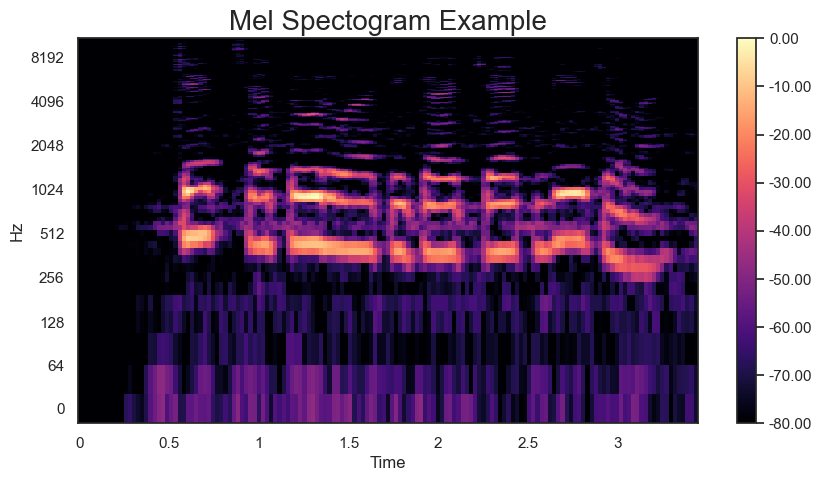

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()